# WPDx Predictions Dataset

The Water Point Data Exchange have come up with their own predictor of water point functionality, with a much more limited dataset and using basic ML models. We will extract key accuracy metrics to be compared to our other models.

In [62]:
# importing relevant packages and functions
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_00_packages_functions.py

In [63]:
# fetching hidden api key from desktop stored under 'water_api_key'
%run /Users/thomasadler/Desktop/futuristic-platipus/keys.py

In [64]:
# defining working directory
filepath = '/Users/thomasadler/Desktop/futuristic-platipus/data/'

In [65]:
# setting API endpoint, dataset, key and client profile
socrata_domain = 'data.waterpointdata.org'
socrata_dataset_identifier = '9pn9-g5u4'
socrata_token = os.environ.get(water_api_key)
client = Socrata(socrata_domain, socrata_token, timeout=10)

In [66]:
# creating query to fetch Uganda water points, all columns included
water_uganda_query = """
select
    *
limit
    200000
"""

In [67]:
# query dataset and store in dataframe
results = client.get(socrata_dataset_identifier, query=water_uganda_query)
wpdx_prediction_df_raw = pd.DataFrame.from_records(results)

In [68]:
# keep raw dataset untouched
wpdx_prediction_df = wpdx_prediction_df_raw.copy()

In [69]:
# short look at data
wpdx_prediction_df.head()

,row_id,country_name,status_id,management,install_year,age,source,adm1,adm2,wpdx_id,...,location,count,notes,prediction,prediction_level,geocoded_column,:@computed_region_7zzf_xi3x,water_source,pay,water_tech
0,212904,Uganda,True,Community Management,2000,9,"Ministry of Water and Environment, Uganda",APAC,KWANIA,wpdx-00212904,...,"(1.85898, 32.5605)",1,Village=AJAR,0.775195278,Low Risk,"{'type': 'Point', 'coordinates': [32.5605, 1.8...",164,NaN,NaN,NaN
1,223181,Uganda,True,Community Management,NaN,NaN,"Ministry of Water and Environment, Uganda",KOTIDO,JIE,wpdx-00223181,...,"(2.99382, 34.1998)",1,Village=LORIU,0.744118007,Low Risk,"{'type': 'Point', 'coordinates': [34.1998, 2.9...",164,Dam,NaN,NaN
2,203413,Uganda,True,Community Management,2009,0,"Ministry of Water and Environment, Uganda",ARUA,AYIVU,wpdx-00203413,...,"(3.0963, 30.9006)",1,Village=OMI,0.531849859,Medium Risk,"{'type': 'Point', 'coordinates': [30.9006, 3.0...",164,Shallow well,NaN,NaN
3,203353,Uganda,True,Community Management,1987,22,"Ministry of Water and Environment, Uganda",ARUA,AYIVU,wpdx-00203353,...,"(3.0128, 30.8331)",1,Village=ANDRU,0.641468187,Medium Risk,"{'type': 'Point', 'coordinates': [30.8331, 3.0...",164,Protected spring,NaN,NaN
4,203801,Uganda,True,Community Management,2006,3,"Ministry of Water and Environment, Uganda",ARUA,AYIVU,wpdx-00203801,...,"(2.986, 30.9401)",1,Village=Ogayi,0.839493928,Low Risk,"{'type': 'Point', 'coordinates': [30.9401, 2.9...",164,Protected spring,NaN,NaN


In [70]:
# looking at column datatypes
wpdx_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97268 entries, 0 to 97267
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   row_id                       97268 non-null  object
 1   country_name                 97268 non-null  object
 2   status_id                    97268 non-null  bool  
 3   management                   97268 non-null  object
 4   install_year                 92790 non-null  object
 5   age                          92790 non-null  object
 6   source                       97268 non-null  object
 7   adm1                         97268 non-null  object
 8   adm2                         97268 non-null  object
 9   wpdx_id                      97268 non-null  object
 10  report_date                  97268 non-null  object
 11  country_id                   97268 non-null  object
 12  activity_id                  97268 non-null  object
 13  data_lnk                     97

In [71]:
#choosing relevant columns
wpdx_prediction_df=wpdx_prediction_df[['status_id', 'prediction' ]]

#check
wpdx_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97268 entries, 0 to 97267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   status_id   97268 non-null  bool  
 1   prediction  97268 non-null  object
dtypes: bool(1), object(1)
memory usage: 855.0+ KB


In [72]:
#checking missing values
wpdx_prediction_df.isna().sum().sum()

0

In [73]:
# convert to number
for col in ['prediction']:
    float_converter(wpdx_prediction_df, col)

# check
wpdx_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97268 entries, 0 to 97267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status_id   97268 non-null  bool   
 1   prediction  97268 non-null  float32
dtypes: bool(1), float32(1)
memory usage: 475.1 KB


In [74]:
# convert to binary
wpdx_prediction_df['status_id'] = np.where(wpdx_prediction_df['status_id']==True, 1, 0)

# check
wpdx_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97268 entries, 0 to 97267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status_id   97268 non-null  int64  
 1   prediction  97268 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 1.1 MB


In [75]:
wpdx_prediction_df['y_prediction_wpdx']=np.where(wpdx_prediction_df['prediction']>0.5,1,0)

wpdx_prediction_df['y_prediction_wpdx'].value_counts(normalize=True)


1    0.858515
0    0.141485
Name: y_prediction_wpdx, dtype: float64

In [76]:
#rename columns
wpdx_prediction_df.rename(columns={'status_id':"y_real_wpdx", 'prediction':'y_proba_wpdx'}, inplace=True)

#check
wpdx_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97268 entries, 0 to 97267
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   y_real_wpdx        97268 non-null  int64  
 1   y_proba_wpdx       97268 non-null  float32
 2   y_prediction_wpdx  97268 non-null  int64  
dtypes: float32(1), int64(2)
memory usage: 1.9 MB


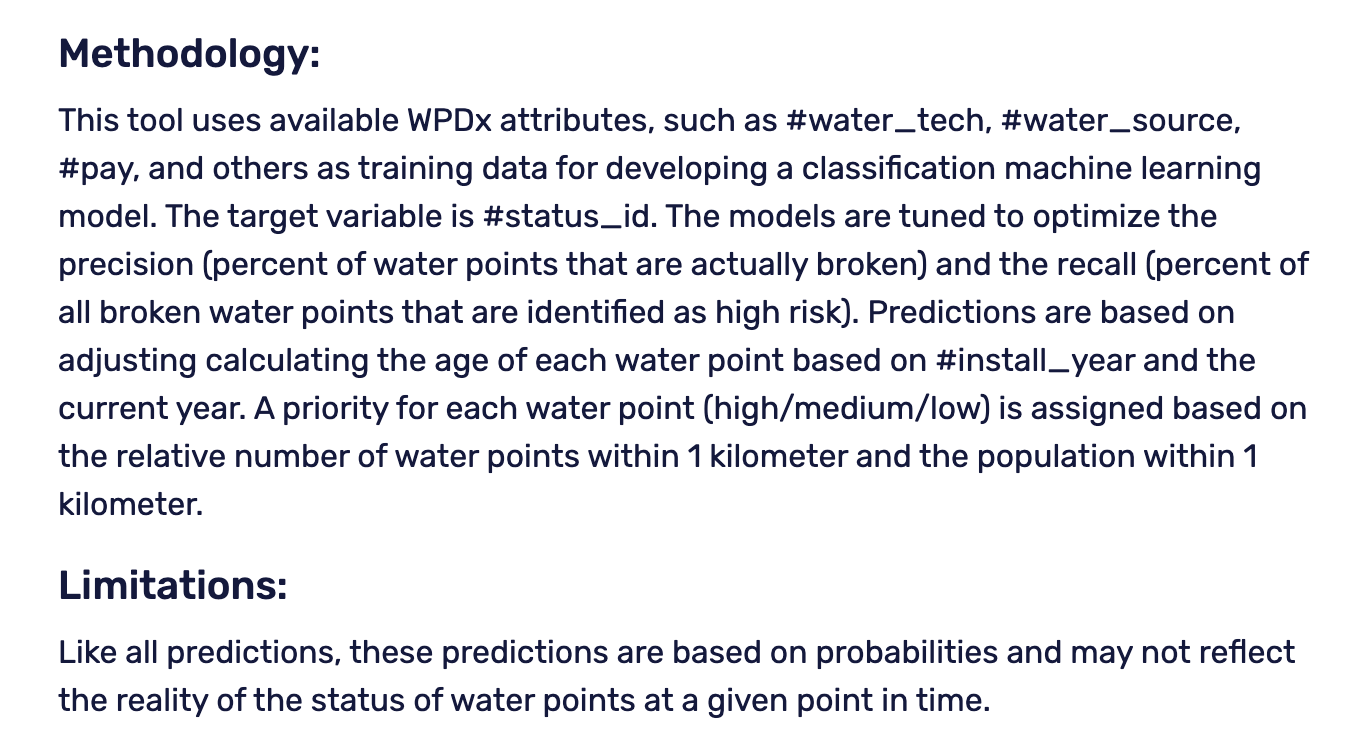

In [77]:
#data dictionary
Image(images_filepath+"WPDx_Methodology.png")

In [78]:
# getting false positive rate and false negative rate
fpr_wpdx, tpr_wpdx, thresholds_roc_wpdx = roc_curve(wpdx_prediction_df['y_real_wpdx'], wpdx_prediction_df['y_proba_wpdx'])

#getting precision/recall scores
precision_wpdx, recall_wpdx, thresholds_pr_wpdx = precision_recall_curve(wpdx_prediction_df['y_real_wpdx'], wpdx_prediction_df['y_proba_wpdx'])

# storing values
roc_auc_wpdx = auc(fpr_wpdx, tpr_wpdx)
pr_auc_wpdx=auc(recall_wpdx, precision_wpdx)

# seeing model results
print(f'ROC AUC: {roc_auc_wpdx}')
print(f'PR AUC: {pr_auc_wpdx}')

print(classification_report(wpdx_prediction_df['y_real_wpdx'], wpdx_prediction_df['y_prediction_wpdx']))

ROC AUC: 0.7889022407467154
PR AUC: 0.9347006100621323
              precision    recall  f1-score   support

           0       0.54      0.40      0.46     18645
           1       0.87      0.92      0.89     78623

    accuracy                           0.82     97268
   macro avg       0.70      0.66      0.68     97268
weighted avg       0.80      0.82      0.81     97268



Their documentation states that they have had the same goal as us: not missing non-functioning water points. They attempted to do so by optimising their model to have a high recall score. They end up with a recall score for non-functioning water points of 0.4.

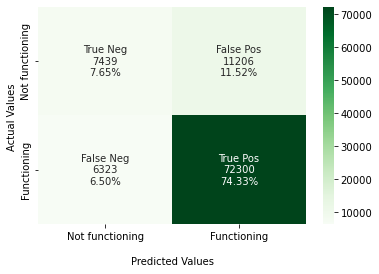

In [79]:
#confusion matrix
cf_matrix=confusion_matrix(wpdx_prediction_df['y_real_wpdx'], wpdx_prediction_df['y_prediction_wpdx'])

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
            cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                    cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
        zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Not functioning','Functioning'])
ax.yaxis.set_ticklabels(['Not functioning','Functioning'])

plt.show()

Similar to our models, the precision and recall score for functioning water points are very high. This is because the sample data is very balanced and has a high number of functioning water points (around 85% are functioning).

In [83]:
#export best model in dataframe
d = {'Model':['WPDx'], 'Parameters':['Unknown'], 'Accuracy Train': [None],\
    'Precision Train': [None], 'Recall Train': [None], 'F1 Train': [None], 'ROC AUC Train':[None],\
        'Accuracy Test': None, 'Precision Test': [precision_wpdx], 'Recall Test': [recall_wpdx], 'F1 Test': [None],\
            'ROC AUC Test':[roc_auc_wpdx],'Time Fit': [None],\
                'Time Predict': [None],   "Precision Non-functioning Test":0.54, "Recall Non-functioning Test":0.40,\
                                "F1 Non-functioning Test":0.46, "Precision Functioning Test":0.87, "Recall Functioning Test":0.92,"F1 Functioning Test":0.89}

#to dataframe
best_model_result_df=pd.DataFrame(data=d)

#check
best_model_result_df

,Model,Parameters,Accuracy Train,Precision Train,Recall Train,F1 Train,ROC AUC Train,Accuracy Test,Precision Test,Recall Test,F1 Test,ROC AUC Test,Time Fit,Time Predict,Precision Non-functioning Test,Recall Non-functioning Test,F1 Non-functioning Test,Precision Functioning Test,Recall Functioning Test,F1 Functioning Test
0,WPDx,Unknown,None,None,None,None,None,None,"[0.8083463563086034, 0.8083443858404532, 0.808...","[1.0, 0.9999872810755123, 0.9999872810755123, ...",None,0.788902,None,None,0.54,0.4,0.46,0.87,0.92,0.89


In [84]:
#export new dataset
best_model_result_df.to_csv(model_filepath + 'wpdx_model.csv')

In [85]:
#save numpy arrays for model comparison
np.save(model_filepath+f'wpdx_fpr_wpdx', fpr_wpdx)
np.save(model_filepath+f'wpdx_tpr_wpdx', tpr_wpdx)